In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
df = pd.read_csv("../hardc/Heart Failure/heart.csv")

In [5]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.shape

(918, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


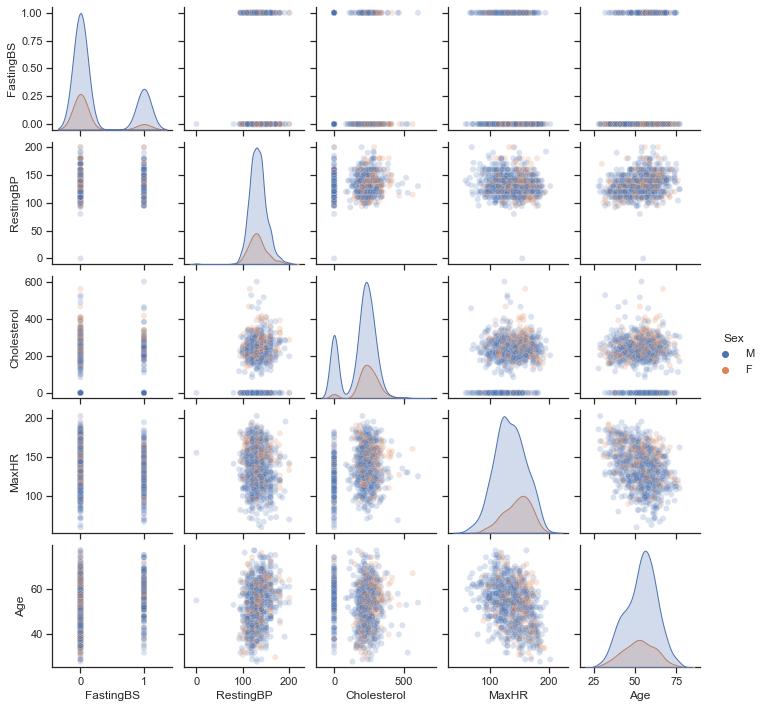

In [8]:
# Visual check
sns.set(style="ticks", color_codes=True)

sns.pairplot(df, hue='Sex', vars=['FastingBS', 'RestingBP', 'Cholesterol', 'MaxHR', 'Age'],
            height = 2, plot_kws={'alpha':.2})

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


<Figure size 720x432 with 0 Axes>

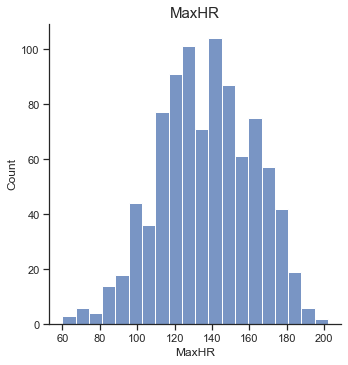

In [10]:
plt.figure(figsize=(10,6))
sns.displot(df["MaxHR"])
plt.title("MaxHR", size=15)
plt.show()

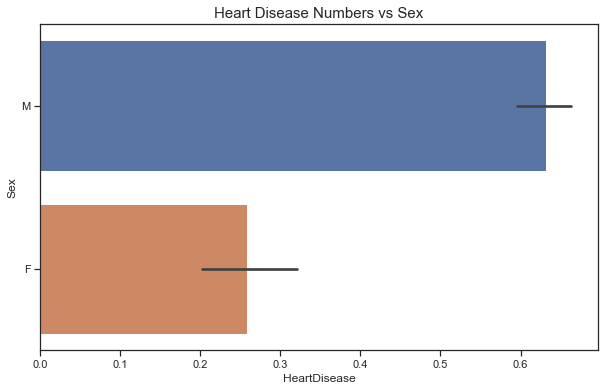

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["HeartDisease"], y=df["Sex"])
plt.title("Heart Disease Numbers vs Sex", size=15)
plt.show()

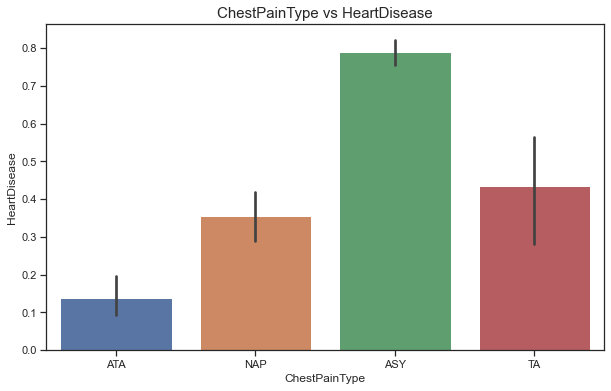

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["ChestPainType"], y=df["HeartDisease"])
plt.title("ChestPainType vs HeartDisease", size=15)
plt.show()

In [13]:
X = df.drop(["HeartDisease"], axis=1)
y = df["HeartDisease"]
y = pd.DataFrame(y, columns=["HeartDisease"])
display(X.head()) # these are our features
display(y.head()) # this is our target



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


,HeartDisease
0,0
1,1
2,0
3,1
4,0


In [15]:
numerical_cols = X.select_dtypes(["float64","int64"])
scaler = sklearn.preprocessing.StandardScaler()
X[numerical_cols.columns] = scaler.fit_transform(X[numerical_cols.columns])
X.head()



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,M,ATA,0.410909,0.825070,-0.551341,Normal,1.382928,N,-0.832432,Up
1,-0.478484,F,NAP,1.491752,-0.171961,-0.551341,Normal,0.754157,N,0.105664,Flat
2,-1.751359,M,ATA,-0.129513,0.770188,-0.551341,ST,-1.525138,N,-0.832432,Up
3,-0.584556,F,ASY,0.302825,0.139040,-0.551341,Normal,-1.132156,Y,0.574711,Flat
4,0.051881,M,NAP,0.951331,-0.034755,-0.551341,Normal,-0.581981,N,-0.832432,Up


In [16]:
# One hot encoding should be done on this dataset to convert all non-numeric 
# into numeric features.
categorical_cols = X.select_dtypes("object")
X = pd.get_dummies(X, columns=categorical_cols.columns)
X.head()



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [17]:
# Split the heart failure dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Prepare DataFrame for the Accuracy results
models = pd.DataFrame(columns=["Model","Accuracy Score"])

# Define the models we want to train and test
classifiers = {'logReg' : LogisticRegression(),
               'GradBC' : GradientBoostingClassifier(),
               'randomforest' : RandomForestClassifier(n_estimators=1000, random_state=42),
               'DT' : DecisionTreeClassifier(max_depth=3),
               'AdaBC' : AdaBoostClassifier()}

# fit and predict each model 
for model_name, model in classifiers.items():
    model.fit(X_train, y_train.values.ravel())
    predictions = model.predict(X_test)
    score = accuracy_score(predictions, y_test)
    print(model_name , {score})
    new_row={"Model": model_name, "Accuracy Score": score}
    models = models.append(new_row, ignore_index=True)

# sort the results
models.sort_values(by="Accuracy Score", ascending=False)

logReg {0.8840579710144928}
GradBC {0.8731884057971014}
randomforest {0.8840579710144928}
DT {0.8333333333333334}
AdaBC {0.8659420289855072}


,Model,Accuracy Score
0,logReg,0.884058
2,randomforest,0.884058
1,GradBC,0.873188
4,AdaBC,0.865942
3,DT,0.833333


In [18]:
# Take a deeper look into one of the models with highest accuracy,
# meaning for the sake of simplicity only for Logistic Regression and its metrics.

# First, take a look at the non-optimized logReg model:
logReg = LogisticRegression()

scores = []
for r in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    fit = logReg.fit(X_train, y_train.values.ravel())
    pred = fit.predict(X_test)
    score = sklearn.metrics.mean_squared_error(y_test, pred)
    scores.append(score)
    
scores = pd.Series(np.sqrt(sorted(scores)))
df = pd.DataFrame({'RMSE': scores})
df.index.name = 'Repeat'
display(df.T)

Repeat,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
RMSE,0.323029,0.348911,0.348911,0.348911,0.355087,0.361158,0.361158,0.367128,0.367128,0.367128,0.367128,0.373002,0.378785,0.378785,0.378785,0.378785,0.384482,0.390095,0.390095,0.395628


,count,mean,std,min,25%,50%,75%,max
RMSE,20.0,0.368206,0.017591,0.323029,0.35964,0.367128,0.378785,0.395628


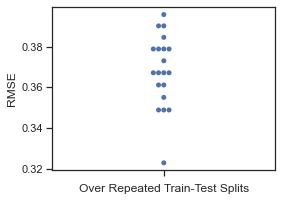

In [19]:
# Visualize the RMSE values and describe the result
ax = plt.figure(figsize=(4,3)).gca()
sns.swarmplot(y = 'RMSE', data = df, ax = ax)
ax.set_xlabel('Over Repeated Train-Test Splits')
display(df.describe().T)

# The RMSE (error) value of our non-optimized logReg model is quite low, that's good!

[[ 78  19]
 [  9 124]]


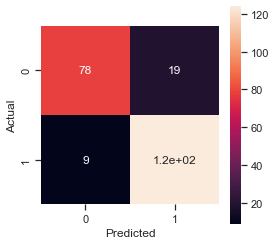

In [20]:
# The Confusion Matrix cm of correct and incorrect predictions

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
cm = sklearn.metrics.confusion_matrix(y_test, pred)
print(cm)
ax = sns.heatmap(cm, annot=True, square=True)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

# So far, the model predicts very well True-positive cases and True-negative cases.

In [21]:
# This is to find out what hyperparameters are available for LogisticRegression
print(sklearn.linear_model.LogisticRegression.get_params(logReg).keys())

# Try to improve the hyperparameters of the logReg model with GridSearchCV
param_grid = [    
    {'penalty' : ['l1', 'l2'],
    'solver' : ['liblinear','saga']}
]

# Now create the GridSearch object
grid_model = sklearn.model_selection.GridSearchCV(logReg,
                               return_train_score = True,
                               param_grid = param_grid,
                               cv = 20,
                               verbose = True,
                               n_jobs = -1)

# Fit the grid_model on the heart failure data
best_model = grid_model.fit(X_train, y_train.values.ravel())

param_cols = ['param_penalty']
score_cols = ['mean_train_score', 'std_train_score',
              'mean_test_score', 'std_test_score']

# Look at first 5 params with head
df = pd.DataFrame(grid_model.cv_results_).head(10)

display(df[param_cols + score_cols])

param_cols = ['param_solver']
score_cols = ['mean_train_score', 'std_train_score',
              'mean_test_score', 'std_test_score']

# Look at first 5 params with head
df = pd.DataFrame(grid_model.cv_results_).head(10)

display(df[param_cols + score_cols])

# As a result, we see that the model for this dataset cannot be optimized

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])
Fitting 20 folds for each of 4 candidates, totalling 80 fits


,param_penalty,mean_train_score,std_train_score,mean_test_score,std_test_score
0,l1,0.867732,0.004040,0.860714,0.067123
1,l1,0.868115,0.003407,0.859286,0.065573
2,l2,0.867732,0.004265,0.860756,0.063855
3,l2,0.867579,0.004427,0.860756,0.063855


,param_solver,mean_train_score,std_train_score,mean_test_score,std_test_score
0,liblinear,0.867732,0.004040,0.860714,0.067123
1,saga,0.868115,0.003407,0.859286,0.065573
2,liblinear,0.867732,0.004265,0.860756,0.063855
3,saga,0.867579,0.004427,0.860756,0.063855
